Weights = [0.17  0.381 0.151 0.27 ]
Bias = 0.042


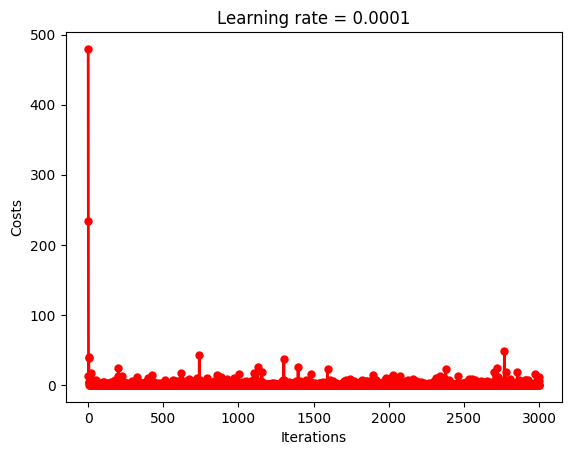

Trainset RMSE = 0.972
Testset RMSE = 0.942


In [3]:
# Textbook: Principles and Practices of Machine Learning
# Lab 2-3: linear regression (train + test), stochastic
# Author: Zhe Chen (ml_iot@163.com), 2021

import pandas
import numpy as np
import matplotlib.pyplot as plt

# parameters
epochs = 1 # number of epochs for training
learning_rate = 0.0001 # learning rate
m_train = 3000 # number of samples for training

# construct a random number generator with given seed
rng = np.random.default_rng(1)

# load dataset
df = pandas.read_csv('temperature_dataset.csv')
data = np.array(df)
m_all = np.shape(data)[0] # number of samples 
d = np.shape(data)[1] - 1 # dimension of input features
m_test = m_all - m_train # number of samples for testing

# split dataset
X_train = data[0:m_train, 1:].T # d by m_train
y_train = data[0:m_train, 0].reshape((1,-1)) # 1 by m_train
X_test = data[m_train:, 1:].T # d by m_test
y_test = data[m_train:, 0].reshape((1,-1)) # 1 by m_test
train_set = data[0:m_train, :] # training dataset

# initialization
w = np.zeros((d, 1)).reshape((-1, 1)) # weights, d by 1
b = 0 # bias, scalar
costs_saved = [] # for saving costs

# loop for each epoch
for epoch in range(epochs):
    
    # shuffle the training dataset for each epoch
    rng.shuffle(train_set)

    # loop for each sample
    for i in range(m_train):
        
        # prepare a training sample
        x = train_set[i, 1:].reshape((-1, 1))
        y = train_set[i, 0]

        # update w,b
        y_hat = np.dot(w.T, x) + b
        e = y_hat - y
        b = b - 2. * learning_rate * e
        w = w - 2. * learning_rate * e * x

        # save costs
        costs = e ** 2
        costs_saved.append(costs.item(0))
    
# print final weights
print('Weights =', np.array2string(np.squeeze(w, axis=1), precision=3))
print(f'Bias = {b.item(0):.3f}')

# plot costs
plt.plot(range(1, np.size(costs_saved) + 1), costs_saved, 'r-o', linewidth=2, markersize=5)
plt.ylabel('Costs')
plt.xlabel('Iterations')
plt.title('Learning rate = ' + str(learning_rate))
plt.show()

# trainset RMSE
y_hat = np.dot(w.T, X_train) + b # broadcasting
e = y_hat - y_train
mse = np.dot(e, e.T) / m_train
rmse = np.sqrt(mse)
print(f'Trainset RMSE = {rmse.item(0):.3f}')

# testset RMSE
y_hat_test = np.dot(w.T, X_test) + b # broadcasting
e_test = y_hat_test - y_test
mse_test = np.dot(e_test, e_test.T) / m_test
rmse_test = np.sqrt(mse_test)
print(f'Testset RMSE = {rmse_test.item(0):.3f}')
